# 👻 Ghost on Local
---
[![Phantom](https://img.shields.io/badge/Version-2.0-teal.svg)]()
[![Phantom](https://img.shields.io/badge/Github-👻-black.svg)](https://github.com/Ming-doan/timeseries-imputation.git)

In [1]:
import pandas as pd
from modules.alias import get_by_aliases
from modules.utils.preprocessing import Preprocessing
from modules.utils.missing import CreateMissingDataFrame
from modules.train import Trainer
from modules.models import *
from modules.utils.callbacks import SavePlot, Combined
from modules.utils.generator import WindowGenerator
from modules.utils.cache import Cache

In [2]:
# Datasets
DATASET = 'PhuLien'
SELECTED_COLUMNS = ['WaterLevel']
# Missing values
MISSING_PERCENTAGE = 5
MISSING_GAPS = 1
SEED = 42
MODE = 'Random' # 'Random', 'Linear'
# Models
WINDOW_SIZE = 10
BATCH_SIZE = 32
MODELS = get_by_aliases(['lr', 'rf', 'vote', 'jeong'])

### Preprocessing

In [3]:
import os
if not os.path.exists('results'):
    os.makedirs('results')

In [4]:
# Read CSV
df = pd.read_csv(f'{DATASET}.csv')
df = df[SELECTED_COLUMNS]

In [5]:
# Preprocessing data
preprocessing = Preprocessing()
df = preprocessing.flow(df)

In [6]:
# Create missing data
creator = CreateMissingDataFrame(df, MISSING_PERCENTAGE, MISSING_GAPS, split_mode=MODE, seed=SEED)

2023-10-30 19:54:41.112 | SUCCESS  | modules.utils.missing:__dropping_dataframe:150 - Dropped dataframe successfully. Missing indexs: [(102, 135)]


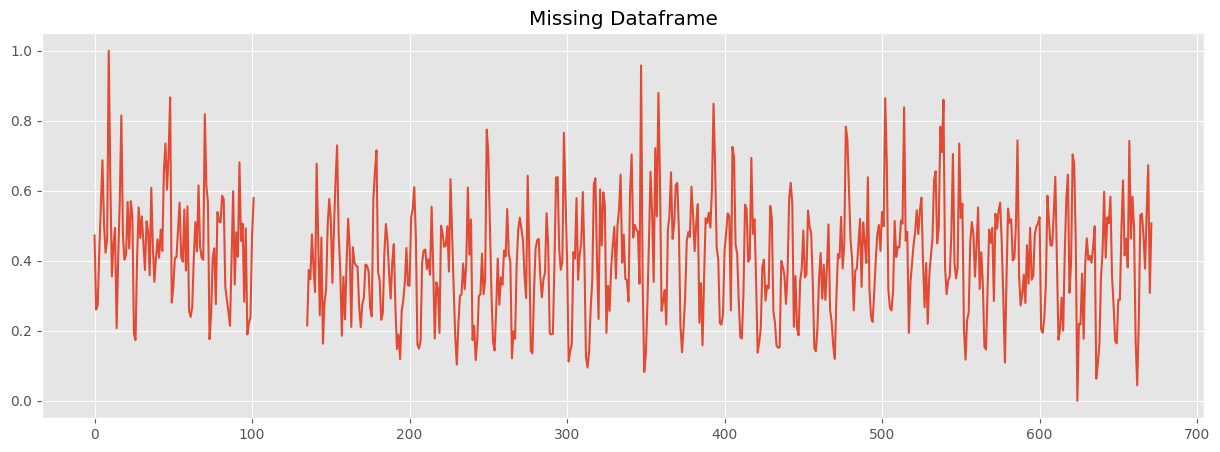

In [7]:
creator.plot(save_path='results/missing_data.png')

### Training

2023-10-30 19:54:41.384 | INFO     | modules.train:train:84 - Model 1/4: LinearRegression
2023-10-30 19:54:41.385 | INFO     | modules.train:train:89 - Fitting the model LinearRegression
2023-10-30 19:54:41.386 | INFO     | modules.train:train:103 - Cache miss 2504718563920


┌──────────────────┬────────┬───────────────┬────────┬──────────┐
│ Model            │ copy_X │ fit_intercept │ n_jobs │ positive │
├──────────────────┼────────┼───────────────┼────────┼──────────┤
│ LinearRegression │ True   │ True          │ None   │ False    │
└──────────────────┴────────┴───────────────┴────────┴──────────┘


Generating windows: 100%|██████████| 92/92 [00:00<00:00, 15329.57it/s]
2023-10-30 19:54:41.396 | INFO     | modules.train:train:115 - Training completed in 0.01s
2023-10-30 19:54:41.397 | INFO     | modules.train:train:129 - Cache miss 2504717813456
Generating windows: 100%|██████████| 23/23 [00:00<00:00, 10795.55it/s]
2023-10-30 19:54:41.402 | INFO     | modules.train:train:150 - Similarity on predicting: 0.8949343781325751


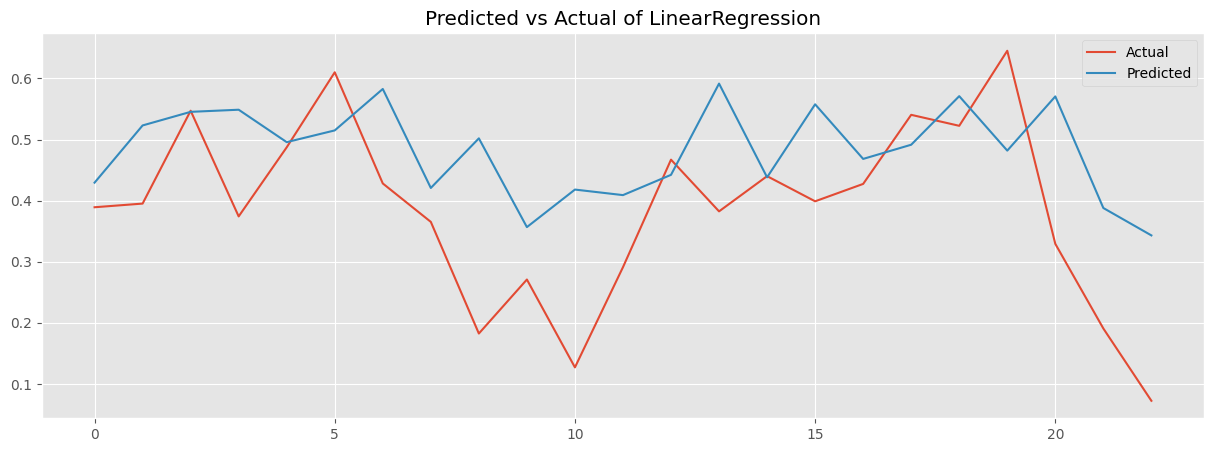

Forecasting: 100%|██████████| 33/33 [00:00<00:00, 10997.30it/s]
2023-10-30 19:54:41.549 | INFO     | modules.train:train:165 - Similarity on forecasting: 0.8910815543238845


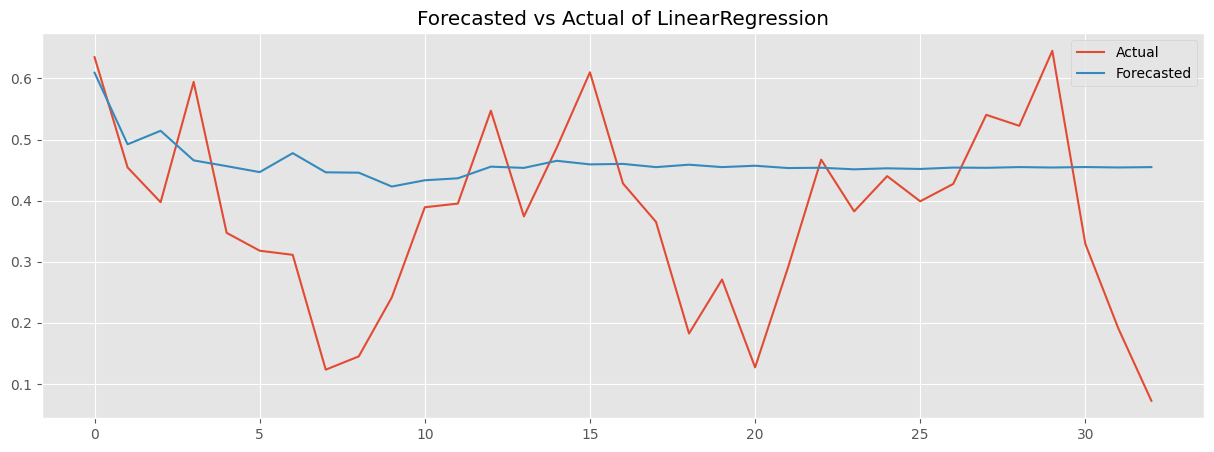

2023-10-30 19:54:41.768 | SUCCESS  | modules.train:train:173 - Model 1/4~LinearRegression completed.
2023-10-30 19:54:41.768 | INFO     | modules.train:train:84 - Model 2/4: RandomForestRegressor
2023-10-30 19:54:41.770 | INFO     | modules.train:train:89 - Fitting the model RandomForestRegressor
2023-10-30 19:54:41.770 | INFO     | modules.train:train:101 - Cache hit 2504718563920
2023-10-30 19:54:41.904 | INFO     | modules.train:train:115 - Training completed in 0.13s
2023-10-30 19:54:41.905 | INFO     | modules.train:train:127 - Cache hit 2504717813456
2023-10-30 19:54:41.909 | INFO     | modules.train:train:150 - Similarity on predicting: 0.8975593196100504


┌──────────────────────┬───────────┬───────────┬───────────────┬───────────┬──────────────┬────────────────┬─────────────┬───────────────────────┬──────────────────┬───────────────────┬──────────────────────────┬──────────────┬────────┬───────────┬──────────────┬─────────┬────────────┐
│ Model                │ bootstrap │ ccp_alpha │ criterion     │ max_depth │ max_features │ max_leaf_nodes │ max_samples │ min_impurity_decrease │ min_samples_leaf │ min_samples_split │ min_weight_fraction_leaf │ n_estimators │ n_jobs │ oob_score │ random_state │ verbose │ warm_start │
├──────────────────────┼───────────┼───────────┼───────────────┼───────────┼──────────────┼────────────────┼─────────────┼───────────────────────┼──────────────────┼───────────────────┼──────────────────────────┼──────────────┼────────┼───────────┼──────────────┼─────────┼────────────┤
│ RandomForestRegre... │ True      │ 0.0       │ squared_error │ None      │ 1.0          │ None           │ None        │ 0.0             

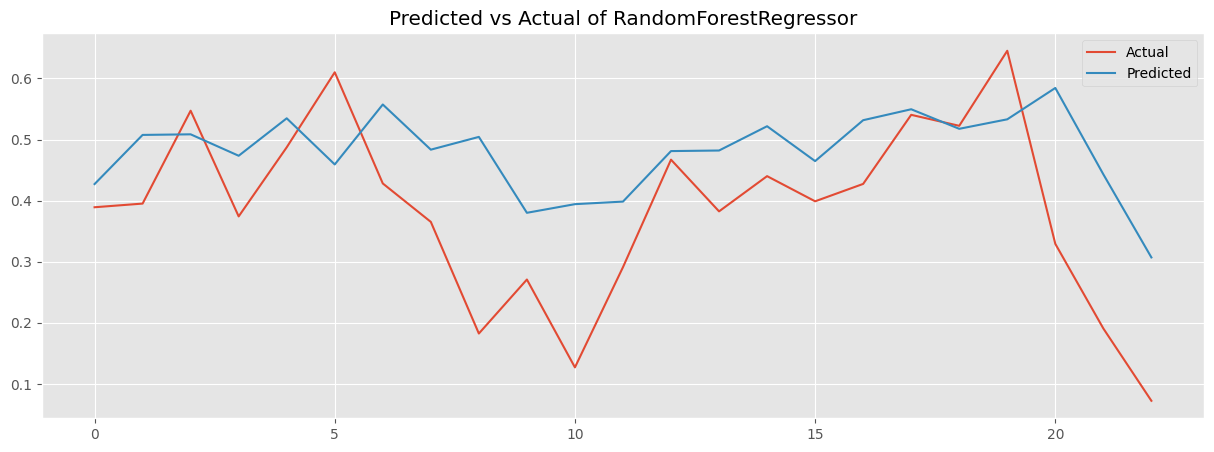

Forecasting: 100%|██████████| 33/33 [00:00<00:00, 374.18it/s]
2023-10-30 19:54:42.127 | INFO     | modules.train:train:165 - Similarity on forecasting: 0.8833689170682127


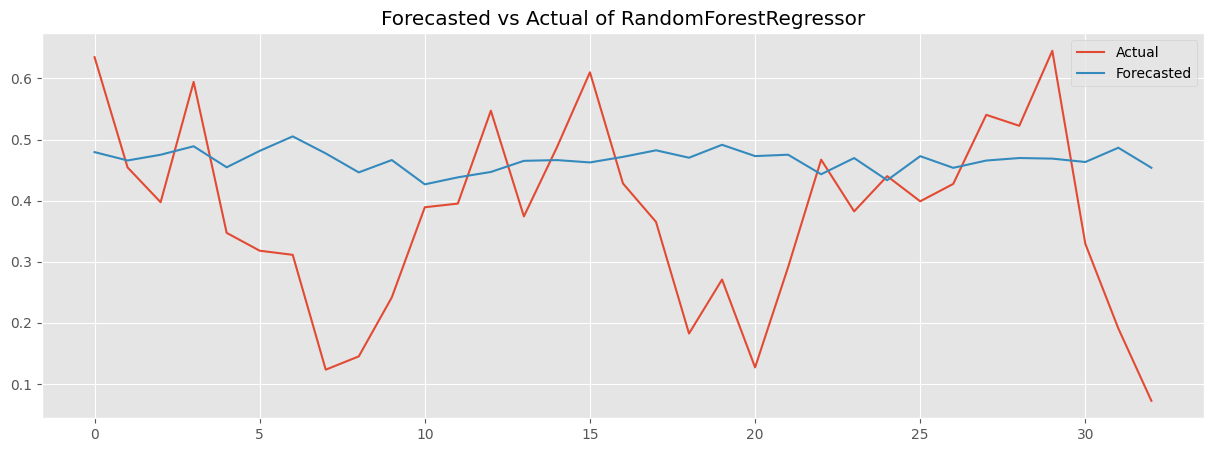

2023-10-30 19:54:42.351 | SUCCESS  | modules.train:train:173 - Model 2/4~RandomForestRegressor completed.
2023-10-30 19:54:42.352 | INFO     | modules.train:train:84 - Model 3/4: VotingRegressor
2023-10-30 19:54:42.367 | INFO     | modules.train:train:89 - Fitting the model VotingRegressor
2023-10-30 19:54:42.368 | INFO     | modules.train:train:101 - Cache hit 2504718563920


┌─────────────────┬──────────────────────┬────────┬─────────┬─────────┬────────────────────┬──────────────────────┬───────┬──────────────────────┬──────────────────────┬─────────────────────┬────────────────────┬──────────────────────┬──────────────────────┬──────────────────────┬────────────┬───────────────────┬────────────┬──────────────┬────────────────┬────────────────┬─────────────┬────────────────────┬─────────────┬──────────────────┬────────┬──────────────┬────────┬─────────────────┬────────────┬─────────────┬──────────────┬────────────┬─────────────┬───────────────┬────────────────┬──────────┬──────────────┬───────────────┬───────────────┬───────────────┬──────────────────┬────────────────────┬───────────────────────────┬──────────────────────┬───────────────────────┬──────────────────────────────┬──────────────────┬──────────────┬───────────────┬───────────────┬───────────────┬──────────────────┬────────────────────┬───────────────────────────┬──────────────────────┬──────────

2023-10-30 19:54:42.712 | INFO     | modules.train:train:115 - Training completed in 0.34s
2023-10-30 19:54:42.714 | INFO     | modules.train:train:127 - Cache hit 2504717813456
2023-10-30 19:54:42.728 | INFO     | modules.train:train:150 - Similarity on predicting: 0.8980476542246365


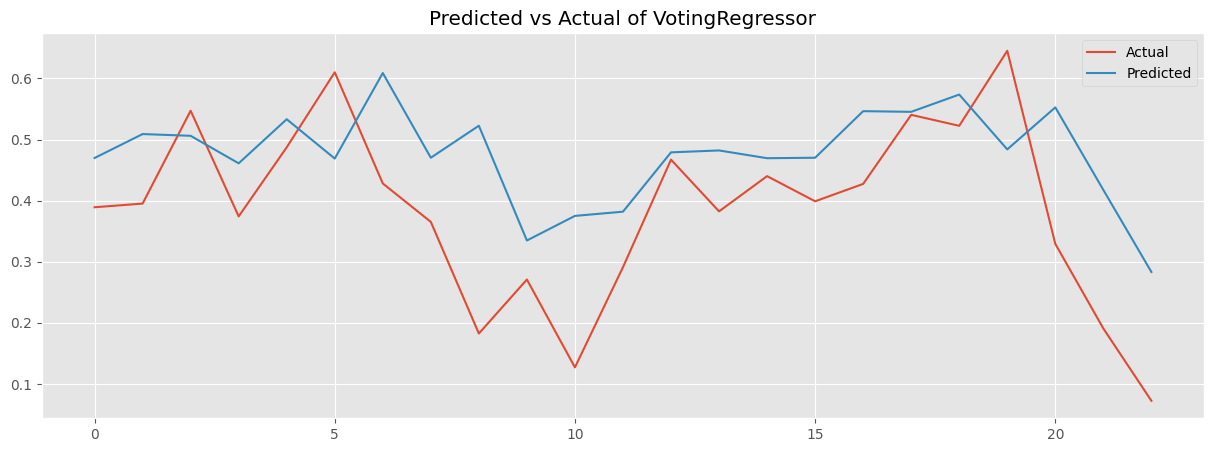

Forecasting: 100%|██████████| 33/33 [00:00<00:00, 71.34it/s]
2023-10-30 19:54:43.350 | INFO     | modules.train:train:165 - Similarity on forecasting: 0.8847282373432875


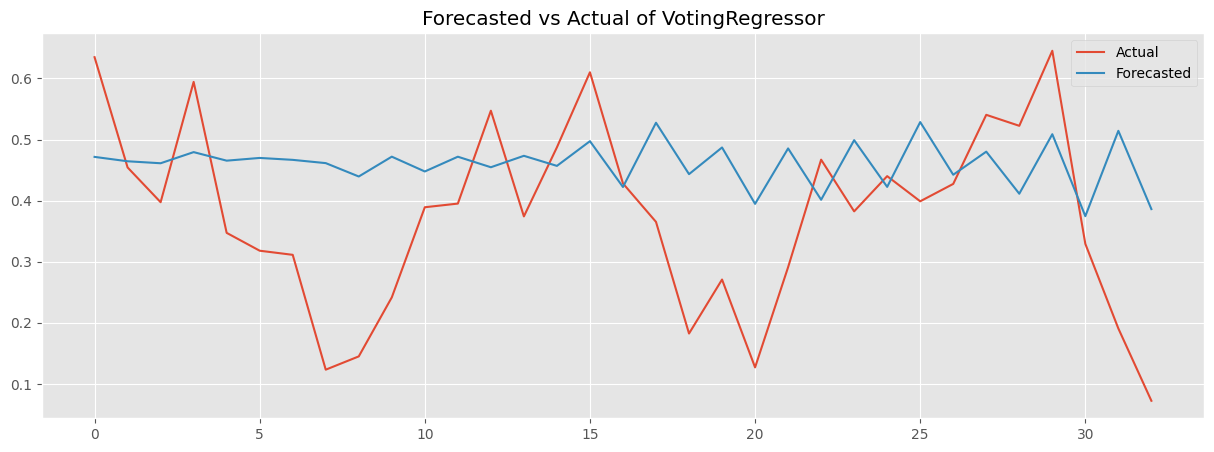

2023-10-30 19:54:43.735 | SUCCESS  | modules.train:train:173 - Model 3/4~VotingRegressor completed.
2023-10-30 19:54:43.736 | INFO     | modules.train:train:84 - Model 4/4: JeongStacking
2023-10-30 19:54:43.737 | INFO     | modules.train:train:89 - Fitting the model JeongStacking
2023-10-30 19:54:43.738 | INFO     | modules.train:train:101 - Cache hit 2504718563920


JeongStackingRegressor:
-----------------------
- Stage 1:
    - AdaBoostRegressor (base_estimator: deprecated, estimator__ccp_alpha: 0.0, estimator__criterion: squared_error, estimator__max_depth: None, estimator__max_features: None, estimator__max_leaf_nodes: None, estimator__min_impurity_decrease: 0.0, estimator__min_samples_leaf: 1, estimator__min_samples_split: 2, estimator__min_weight_fraction_leaf: 0.0, estimator__random_state: None, estimator__splitter: best, estimator: DecisionTreeRegressor(), learning_rate: 1.0, loss: linear, n_estimators: 50, random_state: 42)
    - AdaBoostRegressor (base_estimator: deprecated, estimator__ccp_alpha: 0.0, estimator__criterion: squared_error, estimator__max_depth: None, estimator__max_features: None, estimator__max_leaf_nodes: None, estimator__min_impurity_decrease: 0.0, estimator__min_samples_leaf: 1, estimator__min_samples_split: 2, estimator__min_weight_fraction_leaf: 0.0, estimator__random_state: None, estimator__splitter: best, estimator

2023-10-30 19:54:46.403 | INFO     | modules.train:train:115 - Training completed in 2.66s
2023-10-30 19:54:46.404 | INFO     | modules.train:train:127 - Cache hit 2504717813456
2023-10-30 19:54:46.421 | INFO     | modules.train:train:150 - Similarity on predicting: 0.8741700219263692


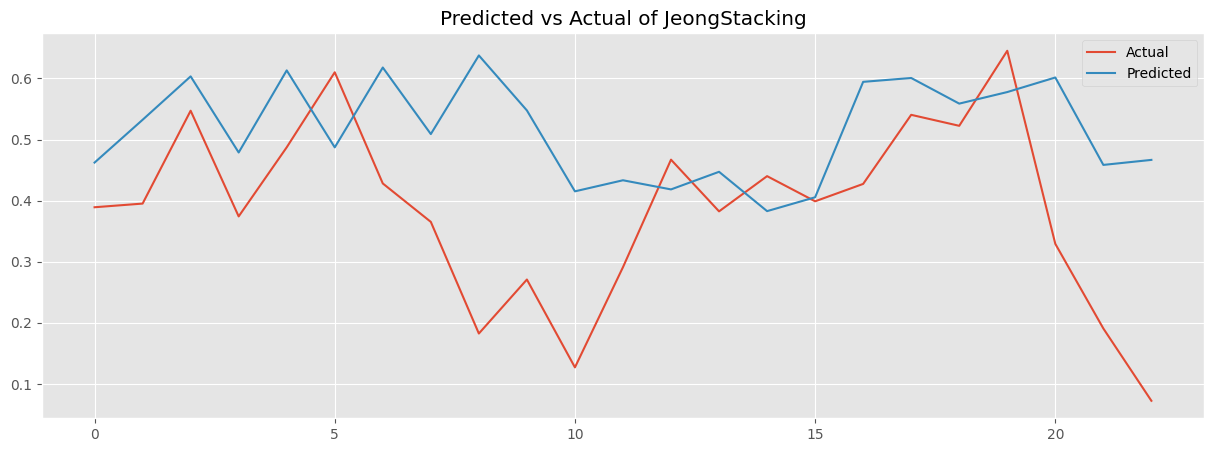

Forecasting: 100%|██████████| 33/33 [00:00<00:00, 62.31it/s]
2023-10-30 19:54:47.070 | INFO     | modules.train:train:165 - Similarity on forecasting: 0.8750664924278382


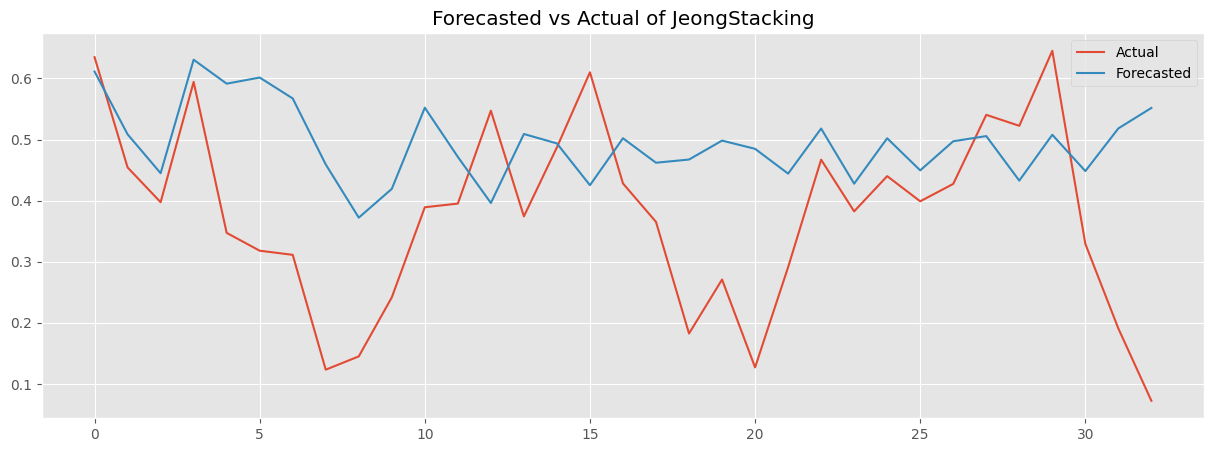

2023-10-30 19:54:47.284 | SUCCESS  | modules.train:train:173 - Model 4/4~JeongStacking completed.
2023-10-30 19:54:47.285 | INFO     | modules.train:reset:41 - All models have been reset.
2023-10-30 19:54:47.286 | INFO     | modules.train:train:84 - Model 1/4: LinearRegression
2023-10-30 19:54:47.286 | INFO     | modules.train:train:89 - Fitting the model LinearRegression
2023-10-30 19:54:47.287 | INFO     | modules.train:train:103 - Cache miss 2504756211216


┌──────────────────┬────────┬───────────────┬────────┬──────────┐
│ Model            │ copy_X │ fit_intercept │ n_jobs │ positive │
├──────────────────┼────────┼───────────────┼────────┼──────────┤
│ LinearRegression │ True   │ True          │ None   │ False    │
└──────────────────┴────────┴───────────────┴────────┴──────────┘


Generating windows: 100%|██████████| 527/527 [00:00<00:00, 27017.69it/s]
2023-10-30 19:54:47.310 | INFO     | modules.train:train:115 - Training completed in 0.02s
2023-10-30 19:54:47.311 | INFO     | modules.train:train:129 - Cache miss 2504718142160
Generating windows: 100%|██████████| 23/23 [00:00<00:00, 23045.63it/s]
2023-10-30 19:54:47.315 | INFO     | modules.train:train:150 - Similarity on predicting: 0.9143410080585446


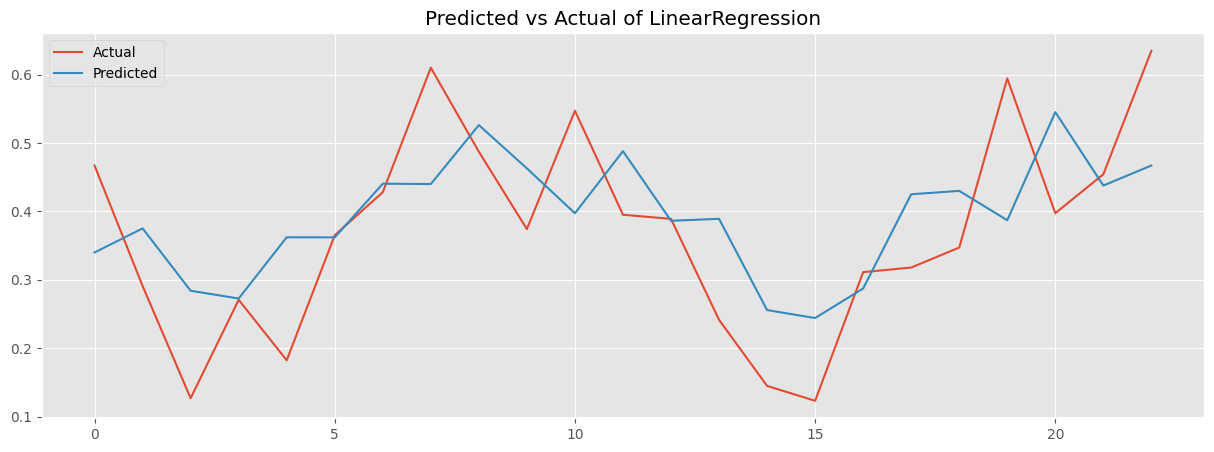

Forecasting: 100%|██████████| 33/33 [00:00<00:00, 16524.84it/s]
2023-10-30 19:54:47.441 | INFO     | modules.train:train:165 - Similarity on forecasting: 0.9091625504689763


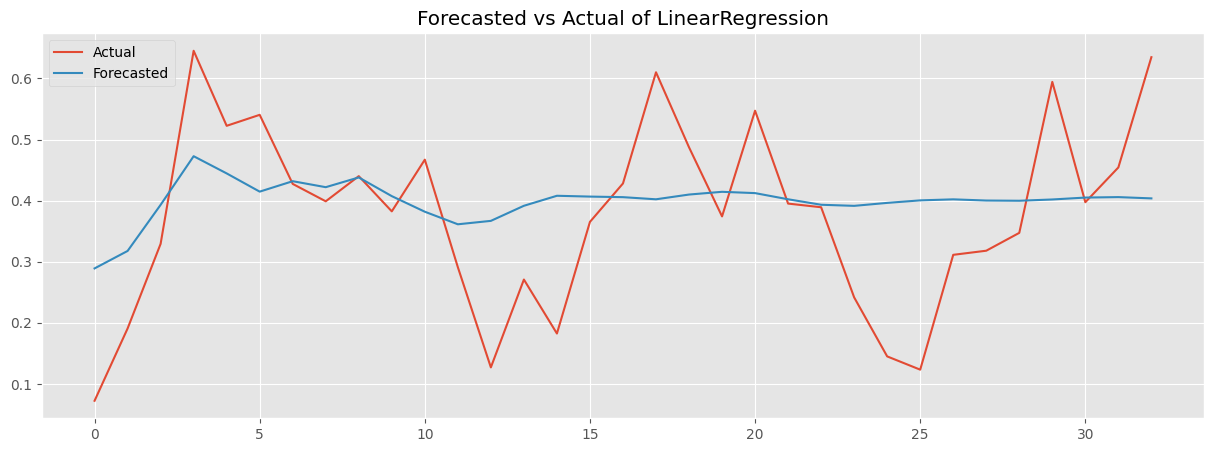

2023-10-30 19:54:47.642 | SUCCESS  | modules.train:train:173 - Model 1/4~LinearRegression completed.
2023-10-30 19:54:47.643 | INFO     | modules.train:train:84 - Model 2/4: RandomForestRegressor
2023-10-30 19:54:47.644 | INFO     | modules.train:train:89 - Fitting the model RandomForestRegressor
2023-10-30 19:54:47.644 | INFO     | modules.train:train:101 - Cache hit 2504756211216


┌──────────────────────┬───────────┬───────────┬───────────────┬───────────┬──────────────┬────────────────┬─────────────┬───────────────────────┬──────────────────┬───────────────────┬──────────────────────────┬──────────────┬────────┬───────────┬──────────────┬─────────┬────────────┐
│ Model                │ bootstrap │ ccp_alpha │ criterion     │ max_depth │ max_features │ max_leaf_nodes │ max_samples │ min_impurity_decrease │ min_samples_leaf │ min_samples_split │ min_weight_fraction_leaf │ n_estimators │ n_jobs │ oob_score │ random_state │ verbose │ warm_start │
├──────────────────────┼───────────┼───────────┼───────────────┼───────────┼──────────────┼────────────────┼─────────────┼───────────────────────┼──────────────────┼───────────────────┼──────────────────────────┼──────────────┼────────┼───────────┼──────────────┼─────────┼────────────┤
│ RandomForestRegre... │ True      │ 0.0       │ squared_error │ None      │ 1.0          │ None           │ None        │ 0.0             

2023-10-30 19:54:48.314 | INFO     | modules.train:train:115 - Training completed in 0.67s
2023-10-30 19:54:48.315 | INFO     | modules.train:train:127 - Cache hit 2504718142160
2023-10-30 19:54:48.319 | INFO     | modules.train:train:150 - Similarity on predicting: 0.9199630110978994


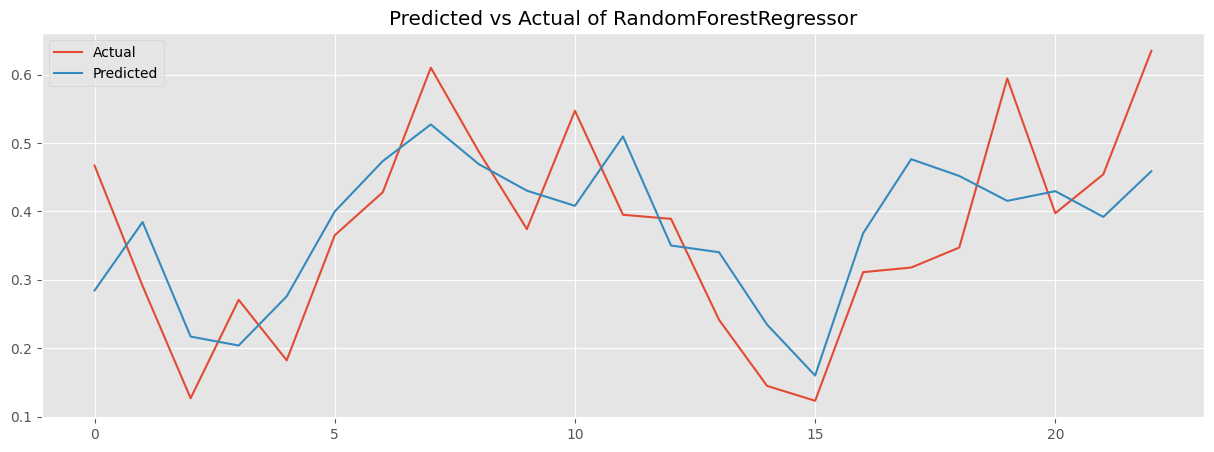

Forecasting: 100%|██████████| 33/33 [00:00<00:00, 345.47it/s]
2023-10-30 19:54:48.545 | INFO     | modules.train:train:165 - Similarity on forecasting: 0.9323377613273764


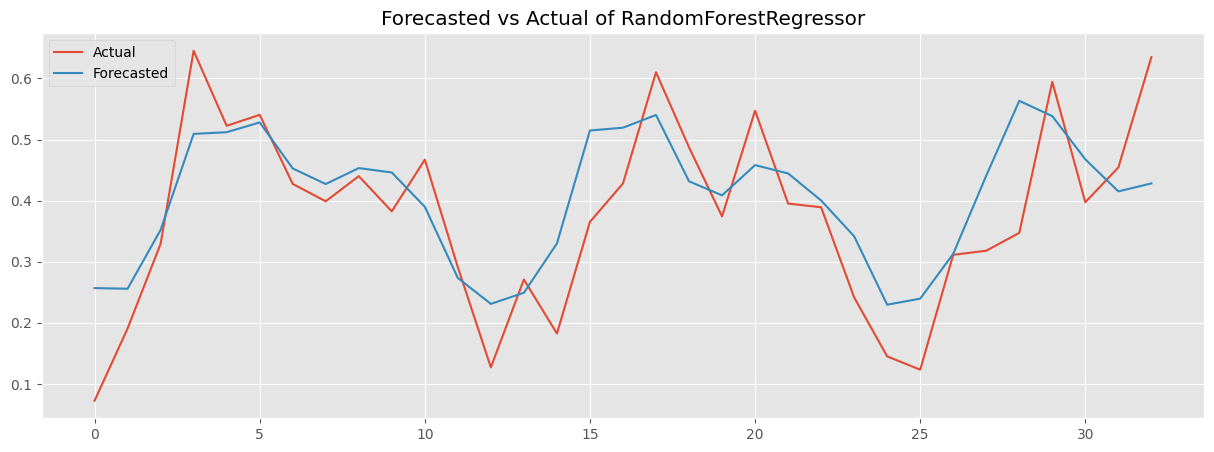

2023-10-30 19:54:48.758 | SUCCESS  | modules.train:train:173 - Model 2/4~RandomForestRegressor completed.
2023-10-30 19:54:48.759 | INFO     | modules.train:train:84 - Model 3/4: VotingRegressor
2023-10-30 19:54:48.769 | INFO     | modules.train:train:89 - Fitting the model VotingRegressor
2023-10-30 19:54:48.770 | INFO     | modules.train:train:101 - Cache hit 2504756211216


┌─────────────────┬──────────────────────┬────────┬─────────┬─────────┬────────────────────┬──────────────────────┬───────┬──────────────────────┬──────────────────────┬─────────────────────┬────────────────────┬──────────────────────┬──────────────────────┬──────────────────────┬────────────┬───────────────────┬────────────┬──────────────┬────────────────┬────────────────┬─────────────┬────────────────────┬─────────────┬──────────────────┬────────┬──────────────┬────────┬─────────────────┬────────────┬─────────────┬──────────────┬────────────┬─────────────┬───────────────┬────────────────┬──────────┬──────────────┬───────────────┬───────────────┬───────────────┬──────────────────┬────────────────────┬───────────────────────────┬──────────────────────┬───────────────────────┬──────────────────────────────┬──────────────────┬──────────────┬───────────────┬───────────────┬───────────────┬──────────────────┬────────────────────┬───────────────────────────┬──────────────────────┬──────────

2023-10-30 19:54:49.933 | INFO     | modules.train:train:115 - Training completed in 1.16s
2023-10-30 19:54:49.934 | INFO     | modules.train:train:127 - Cache hit 2504718142160
2023-10-30 19:54:49.950 | INFO     | modules.train:train:150 - Similarity on predicting: 0.9211503561363557


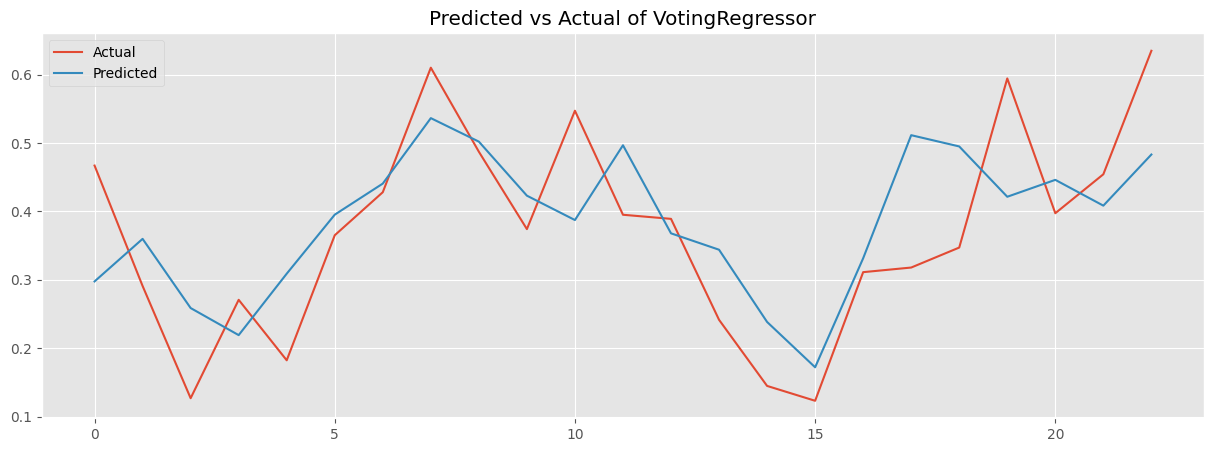

Forecasting: 100%|██████████| 33/33 [00:00<00:00, 73.48it/s]
2023-10-30 19:54:50.559 | INFO     | modules.train:train:165 - Similarity on forecasting: 0.9244927483772636


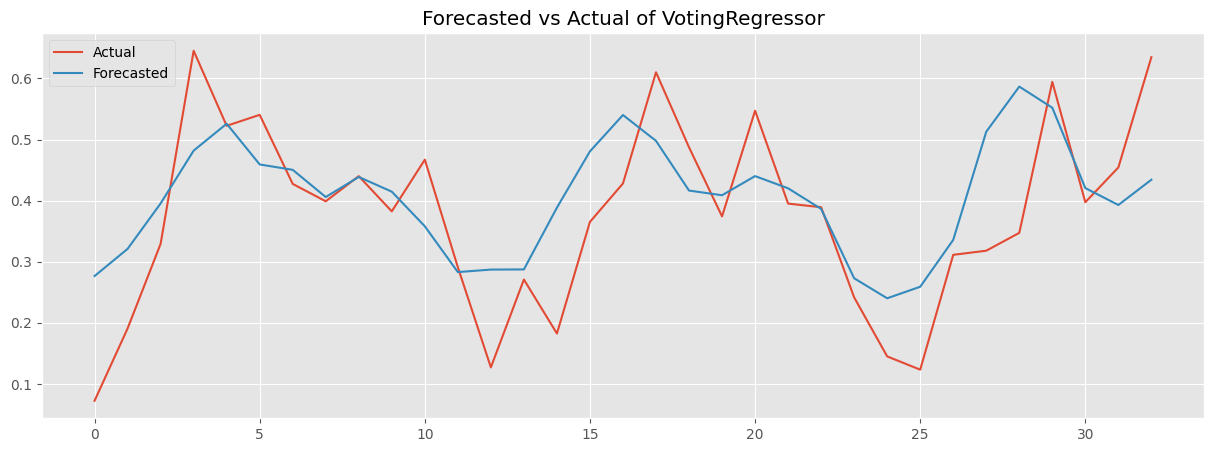

2023-10-30 19:54:50.808 | SUCCESS  | modules.train:train:173 - Model 3/4~VotingRegressor completed.
2023-10-30 19:54:50.808 | INFO     | modules.train:train:84 - Model 4/4: JeongStacking
2023-10-30 19:54:50.810 | INFO     | modules.train:train:89 - Fitting the model JeongStacking
2023-10-30 19:54:50.810 | INFO     | modules.train:train:101 - Cache hit 2504756211216


JeongStackingRegressor:
-----------------------
- Stage 1:
    - AdaBoostRegressor (base_estimator: deprecated, estimator__ccp_alpha: 0.0, estimator__criterion: squared_error, estimator__max_depth: None, estimator__max_features: None, estimator__max_leaf_nodes: None, estimator__min_impurity_decrease: 0.0, estimator__min_samples_leaf: 1, estimator__min_samples_split: 2, estimator__min_weight_fraction_leaf: 0.0, estimator__random_state: None, estimator__splitter: best, estimator: DecisionTreeRegressor(), learning_rate: 1.0, loss: linear, n_estimators: 50, random_state: 42)
    - AdaBoostRegressor (base_estimator: deprecated, estimator__ccp_alpha: 0.0, estimator__criterion: squared_error, estimator__max_depth: None, estimator__max_features: None, estimator__max_leaf_nodes: None, estimator__min_impurity_decrease: 0.0, estimator__min_samples_leaf: 1, estimator__min_samples_split: 2, estimator__min_weight_fraction_leaf: 0.0, estimator__random_state: None, estimator__splitter: best, estimator

2023-10-30 19:55:01.265 | INFO     | modules.train:train:115 - Training completed in 10.46s
2023-10-30 19:55:01.266 | INFO     | modules.train:train:127 - Cache hit 2504718142160
2023-10-30 19:55:01.283 | INFO     | modules.train:train:150 - Similarity on predicting: 0.9038470816375662


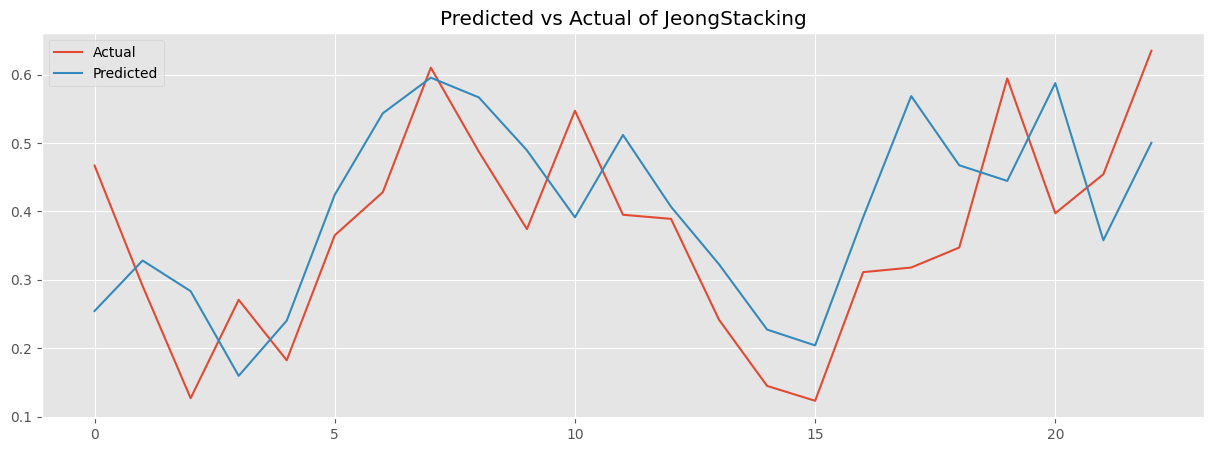

Forecasting: 100%|██████████| 33/33 [00:00<00:00, 64.03it/s]
2023-10-30 19:55:01.926 | INFO     | modules.train:train:165 - Similarity on forecasting: 0.913041906016121


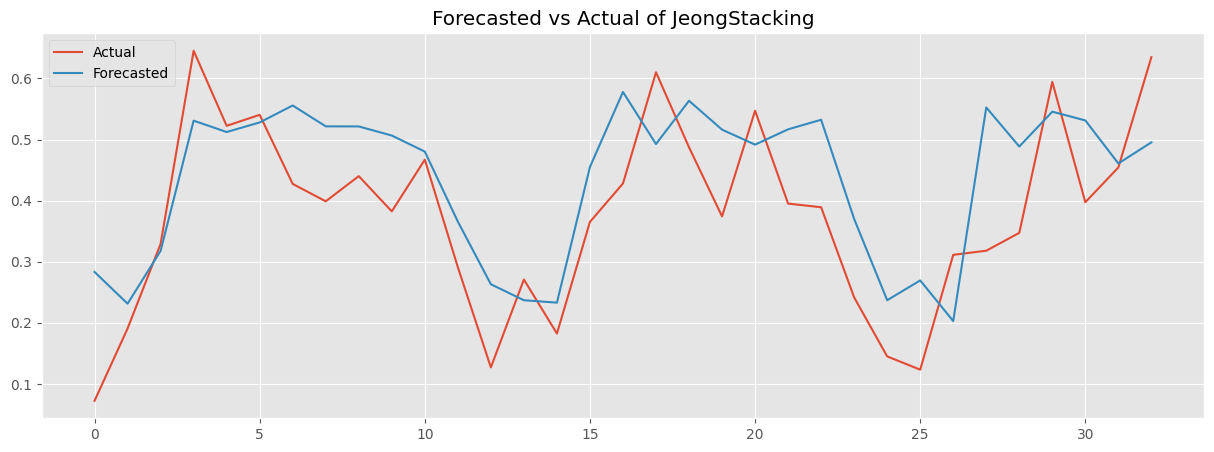

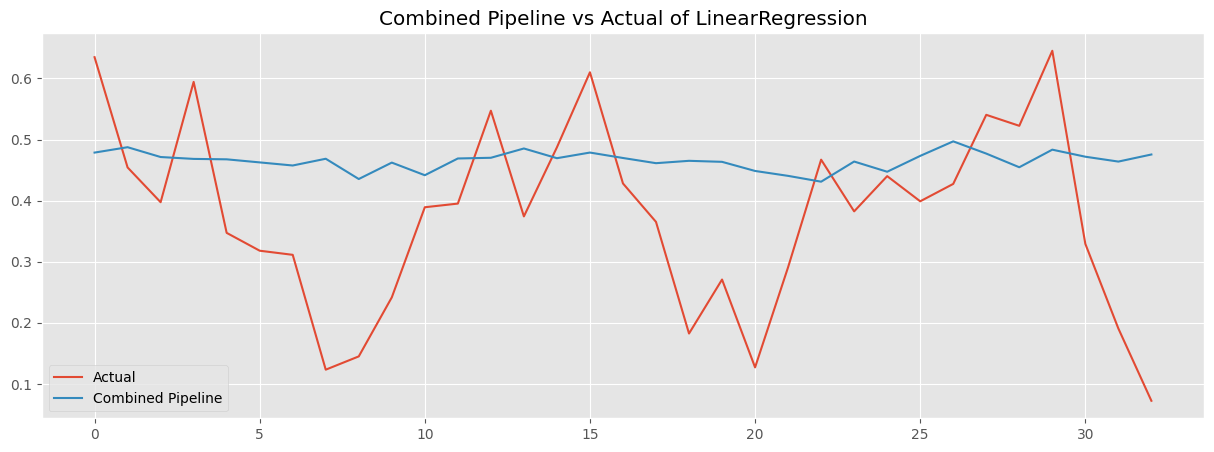

2023-10-30 19:55:02.356 | INFO     | modules.utils.callbacks:after_forecast:231 - Similarity on combining of model LinearRegression: 0.8843143756594829


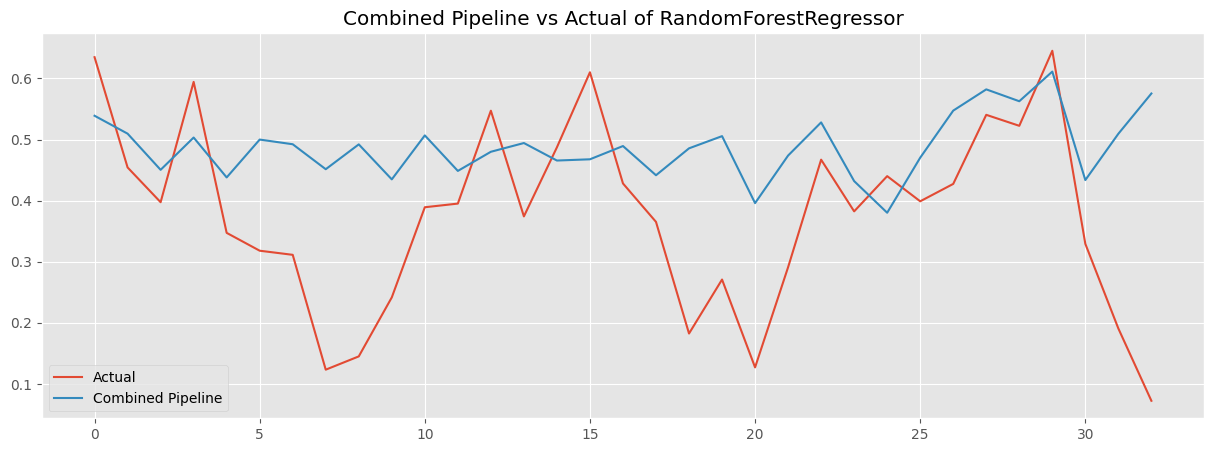

2023-10-30 19:55:02.575 | INFO     | modules.utils.callbacks:after_forecast:231 - Similarity on combining of model RandomForestRegressor: 0.8837465053583121


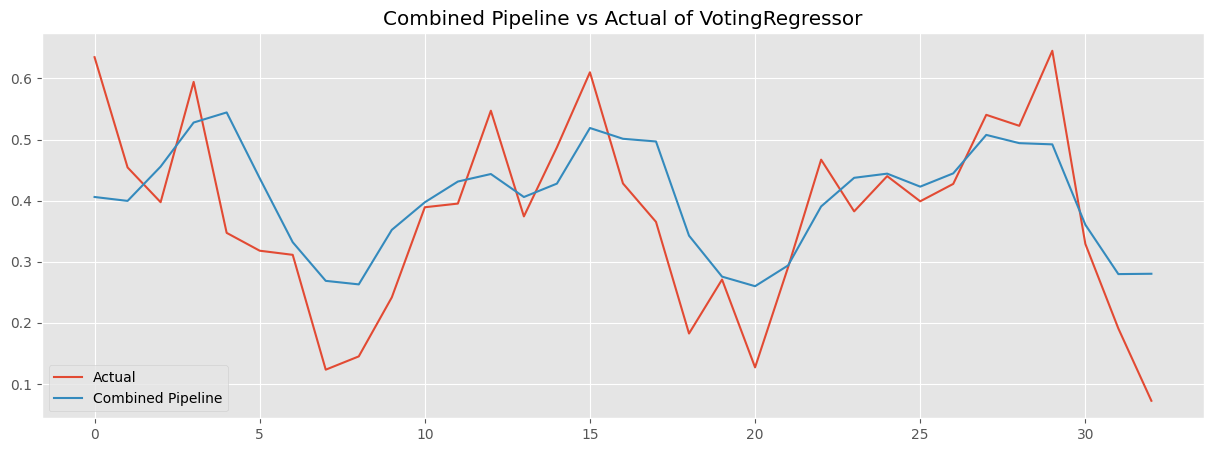

2023-10-30 19:55:02.799 | INFO     | modules.utils.callbacks:after_forecast:231 - Similarity on combining of model VotingRegressor: 0.927992659890366


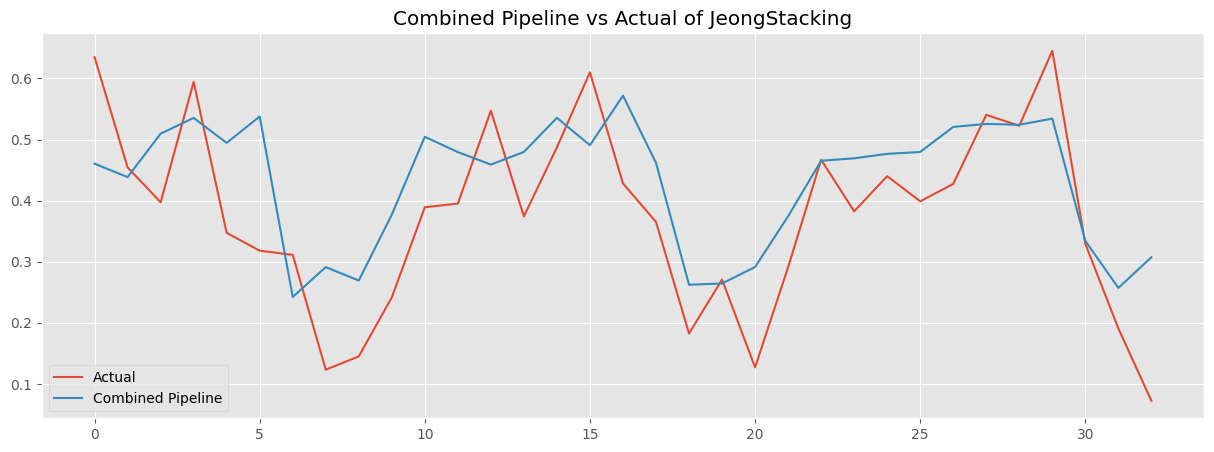

2023-10-30 19:55:03.017 | INFO     | modules.utils.callbacks:after_forecast:231 - Similarity on combining of model JeongStacking: 0.917010001608023
2023-10-30 19:55:03.018 | SUCCESS  | modules.train:train:173 - Model 4/4~JeongStacking completed.
2023-10-30 19:55:03.021 | INFO     | modules.train:reset:41 - All models have been reset.


In [8]:
# Training
trainer = Trainer(model=MODELS)
combined_callback = Combined(n_models=len(MODELS), combination_mode='data_per', df=creator, save_directory="results")
sp = SavePlot(n_models=len(MODELS), save_directory="results")
cache = Cache(live_cache=True)

for train_df, test_df in creator:
    train_gen = WindowGenerator(train_df, WINDOW_SIZE, BATCH_SIZE)
    test_gen = WindowGenerator(test_df, WINDOW_SIZE, BATCH_SIZE)

    trainer.train(train_gen, test_gen, callbacks=[sp, combined_callback], cache=cache)
    trainer.reset()

In [9]:
combined_callback.metrics.metrics.to_csv('results/metrics.csv', index=False)
combined_callback.metrics.metrics

,Model,Similarity,NMAE,RMSE,R2,FSD,FB,FA2
0,LinearRegression,0.884314,0.138880,0.170852,0.322919,1.644119,0.209128,0.818182
1,RandomForestRegressor,0.883747,0.141464,0.180875,0.307351,0.984822,0.255280,0.818182
2,VotingRegressor,0.927993,0.080985,0.101758,0.791678,0.560404,0.068448,0.909091
3,JeongStacking,0.917010,0.093670,0.110842,0.770540,0.387496,0.132885,0.909091


In [10]:
for model in MODELS:
    print(model.name)
    print(model.get_params())
    print('-'*50)

LinearRegression
{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'positive': False}
--------------------------------------------------
RandomForestRegressor
{'bootstrap': True, 'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_depth': None, 'max_features': 1.0, 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}
--------------------------------------------------
VotingRegressor
{'estimators': [('lr', LinearRegression()), ('knn', KNeighborsRegressor()), ('svm', SVR()), ('dt', DecisionTreeRegressor()), ('et', ExtraTreeRegressor()), ('ada', AdaBoostRegressor()), ('bag', BaggingRegressor()), ('gb', GradientBoostingRegressor()), ('rf', RandomForestRegressor()), ('xgb', XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, co

In [11]:
# Plot history
import matplotlib.pyplot as plt
for model in MODELS:
    if 'histories' in dir(model):
        try:
            fig, ax = plt.subplots(1, 2, figsize=(15, 5))
            ax[0].plot(model.histories[0].history['loss'], label='Pipeline')
            ax[0].legend()
            ax[1].plot(model.histories[1].history['loss'], label='Reverse Pipeline')
            ax[1].legend()
            fig.suptitle(f'Loss of {model.name}')
            plt.tight_layout()
        except Exception as e:
            print(e)
            print('\033[91mCannot plot history of model', model.name)